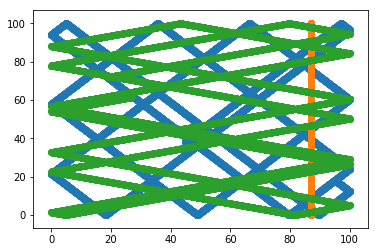

In [9]:
import numpy as np
import random
import array as arr
import matplotlib.pyplot as plt
import time
from numpy import empty
from IPython.display import clear_output
%matplotlib inline

f= open("zderzenia.txt","w+")

n=int(input('What is n?\n'))
a=int(input('What is a?\n'))
max_v=int(input('What is maximum speed?\n'))
tt=int(input('What is the time of simulation?\n'))
t=int(input('What is the time step?\n'))
#r=int(input('What is the particle size?\n'))
r=1.5
t=10**(-1*t)
P=empty([2,n])
V=empty([2,n])

#calculating new velocity after collisions:
def velocity(v1,v2):
    Vel=(abs(v1)+abs(v2))/2
    return Vel

for i in range(n):
    P[0,i]=random.randint(1,a)
    P[1,i]=random.randint(1,a)
    V[0,i]=random.randint(-1*max_v,max_v)
    V[1,i]=random.randint(-1*max_v,max_v)
C=np.array([P[0],P[1],V[0],V[1]])
cycles=int(tt/t)
Positionx=empty([n,cycles])
Positiony=empty([n,cycles])
cn=0
I=np.identity(n)
for k in range(cycles):
    if cn==5:
        cn=1
        I=np.identity(n)
    for p in range(n):
            #saving position
        Positionx[p,k]=C[0,p]
        Positiony[p,k]=C[1,p]
        if C[0,p]<0: #colision with horizontal bottom wall
            C[2,p]=-1*C[2,p]
            C[0,p]=0
        elif C[0,p]>a: #colision with horizontal top wall
            C[2,p]=-1*C[2,p]
            C[0,p]=a
        elif C[1,p]<0: #collision with vertical left wall
            C[3,p]=-1*C[3,p]
            C[1,p]=0
        elif C[1,p]>a: #collision with vertical right wall
            C[3,p]=-1*C[3,p]
            C[1,p]=a
        else:
            C[0,p]=C[0,p]+C[2,p]*t
            C[1,p]=C[1,p]+C[3,p]*t
    #checking for collisions
    q=0
    for p in range(n):
        if p==q:
            continue
        for q in range(n):
            if I[p,q]==1:
                continue
            if ((((C[0,q]-C[0,p])**2)+((C[1,q]-C[1,p])**2))**0.5)<=(r*2):  #condition for collision
                I[p,q]=1
                    #x-direction
                if C[2,q]>0 and C[2,p]>0:
                    C[2,q]=velocity(C[2,q],C[2,p])
                    C[2,p]=velocity(C[2,q],C[2,p])

                elif C[2,q]<0 and C[2,p]<0:
                    C[2,q]=-1*velocity(C[2,q],C[2,p])
                    C[2,p]=-1*velocity(C[2,q],C[2,p])

                elif C[2,q]<0 and C[2,p]>0:
                    C[2,q]=velocity(C[2,q],C[2,p])
                    C[2,p]=-1*velocity(C[2,q],C[2,p])

                elif C[2,q]>0 and C[2,p]<0:
                    C[2,q]=-1*velocity(C[2,q],C[2,p])
                    C[2,p]=velocity(C[2,q],C[2,p])

                    #in y-direction
                if C[3,q]>0 and C[3,p]>0:
                    C[3,q]=velocity(C[3,q],C[3,p])
                    C[3,p]=velocity(C[3,q],C[3,p])

                elif C[3,q]<0 and C[3,p]<0:
                    C[3,q]=-1*velocity(C[3,q],C[3,p])
                    C[3,p]=-1*velocity(C[3,q],C[3,p])

                elif C[3,q]<0 and C[3,p]>0:
                    C[3,q]=velocity(C[3,q],C[3,p])
                    C[3,p]=-1*velocity(C[3,q],C[3,p])

                elif C[3,q]>0 and C[3,p]<0:
                    C[3,q]=-1*velocity(C[3,q],C[3,p])
                    C[3,p]=velocity(C[3,q],C[3,p])
           
    cn=cn+1
#for dynamic graph
c=0
while c<cycles:
    #plt.figure(1, figsize=(110, 110))
    plt.scatter(Positionx[:,c],Positiony[:,c])
    plt.axis([0,a+10,0,a+10])
    plt.show()
    clear_output(wait=(True))
    time.sleep(0.1)
    c=int(c+(0.1/t))
    
#plotting graph
for u in range(n):
    plt.scatter(Positionx[u], Positiony[u])
#saving points to a file
for e in range(n):
    for i in range(cycles):
         f.write("%f " %Positionx[e,i])
f.write("\n")
for e in range(n):
    for i in range(cycles):
        f.write("%f " %Positiony[e,i])
        
f.close() 